In [45]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statistics import mode 
from matplotlib import cm as cm
from sklearn import svm
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', 500)

In [2]:
df = pd.read_csv('properati_caballito_train.csv')
cols = ['Unnamed: 0', 'Unnamed: 0.1','place_name', 'precio_m2_usd']
df.drop(cols, axis=1, inplace=True)
df.head()

,property_type,lat,lon,price_aprox_usd,surface_total_in_m2,price_usd_per_m2,expenses,description,title,dummy_property_type__apartment,dummy_property_type__house,dummy_property_type__store,distSubte,dummy_pileta,dummy_balcon,dummy_patio,dummy_lavadero,dummy_cochera,dummy_luminoso,dummy_terraza,dummy_quincho,dummy_baulera,dummy_parrilla,dummy_premium,dummy_piscina,dummy_ascensor,dummy_profesional,dummy_alarma,dummy_amenities,dummy_calefaccion,dummy_pozo,dummy_gimnasio,dummy_aire acondicionado,dummy_spa,dummy_jacuzzi,dummy_cine
0,apartment,-34.622211,-58.439128,110000,50,2200.000000,NaN,Departamento de 3 Ambientes al Contrafrente. S...,CABALLITO 3 AMB. EN VENTA Listo para escriturar,1,0,0,0.274837,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,apartment,-34.623894,-58.446861,170500,100,1705.000000,NaN,14 exclusivos semi-pisos.Excelentes detalles d...,Semi-Pisos de gran categoria.,1,0,0,0.168539,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,apartment,-34.620928,-58.445874,220410,81,2721.111111,NaN,"Excelentes detalles de terminación, y diseño.G...",Excelencia y Calidad.,1,0,0,0.384946,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,apartment,-34.620928,-58.445874,222780,81,2750.370370,NaN,"Excelentes detalles de terminación, y diseño.G...",Excelencia y Calidad.,1,0,0,0.384946,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,apartment,-34.628786,-58.427783,108000,70,1542.857143,NaN,"Al frente muy luminoso.Living comedor, a balco...",Venta 3 Ambientes con dependencias,1,0,0,0.216992,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.isnull().sum()

In [3]:
df_mini_Y = df.dropna()

In [ ]:
df_mini_Y.isna().sum()

In [8]:
print(df.shape)
print(df_mini_Y.shape)

(1563, 36)
(258, 36)


In [11]:
cols = ['property_type','price_aprox_usd',
       'price_usd_per_m2', 'description', 'title']
df_mini_X = df_mini_Y.drop(cols, axis=1)
df_mini_X.columns

Index(['lat', 'lon', 'surface_total_in_m2', 'expenses',
       'dummy_property_type__apartment', 'dummy_property_type__house',
       'dummy_property_type__store', 'distSubte', 'dummy_pileta',
       'dummy_balcon', 'dummy_patio', 'dummy_lavadero', 'dummy_cochera',
       'dummy_luminoso', 'dummy_terraza', 'dummy_quincho', 'dummy_baulera',
       'dummy_parrilla', 'dummy_premium', 'dummy_piscina', 'dummy_ascensor',
       'dummy_profesional', 'dummy_alarma', 'dummy_amenities',
       'dummy_calefaccion', 'dummy_pozo', 'dummy_gimnasio',
       'dummy_aire acondicionado', 'dummy_spa', 'dummy_jacuzzi', 'dummy_cine'],
      dtype='object')

In [ ]:
sns.pairplot(df_mini_Y)

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr());

In [ ]:
k = 33
cols = df.corr().nlargest(k,'price_usd_per_m2')['price_usd_per_m2'].index
cm = df[cols].corr()
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot=True, cmap = 'OrRd');

In [30]:
# Seleccionar modelo
from sklearn.linear_model import LinearRegression
# Elegir hiperparámetros
model = LinearRegression(fit_intercept=True)
# Preparar los datos en una matriz de features
# Crear X e y
X = df_mini_X #2 dimensiones
y = df_mini_Y['price_usd_per_m2'] #1 dimensión

# Split entrenamiento / testeo para CV
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=1)
#Ajustar el modelo a los datos
model.fit(Xtrain, ytrain)
print (model.coef_)
print (model.intercept_)

[-7.38290925e+03 -3.14184518e+03 -4.40624048e+00  1.21575599e-01
  4.57323894e+02  2.89901436e-12 -8.46966941e-12  9.66256000e+01
 -4.98231294e+02 -1.20396376e+02 -2.30240571e+02  2.73970647e+01
  3.36310242e+02 -7.84951499e+01  6.97020690e+00 -3.75922395e+02
 -2.21412427e+02 -4.25633138e+01 -1.36424205e-12  5.45419790e+02
 -1.16894819e+02  3.44264904e+01 -4.73584179e+01  4.16956684e+02
  1.18964205e+02 -1.14041568e+02  1.78967532e+02  4.06005715e+02
  2.34828247e+01 -3.17426438e+02 -2.80082905e+02]
-437337.26084209955


In [31]:
#Evaluar
ypred = model.predict(Xtest)
from sklearn import metrics
print ('MAE:', metrics.mean_absolute_error(ytest, ypred))
print ('MSE:', metrics.mean_squared_error(ytest, ypred))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(ytest, ypred)))
print ('R2:', metrics.r2_score(ytest, ypred))

MAE: 282.9930095762939
MSE: 139005.61201106184
RMSE: 372.83456386319904
R2: 0.5279461967115268


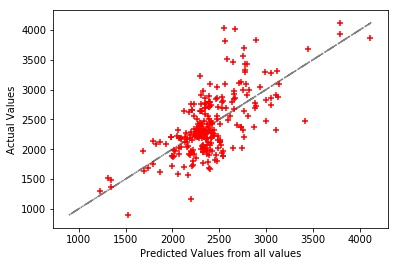

MSE: 144242.09472503501
                                           0
lat                            -8.916534e+03
lon                            -4.297853e+03
surface_total_in_m2            -4.391171e+00
expenses                        1.219400e-01
dummy_property_type__apartment  5.462271e+02
dummy_property_type__house     -2.216893e-12
dummy_property_type__store     -1.193712e-12
distSubte                       1.348794e+02
dummy_pileta                   -1.719722e+02
dummy_balcon                   -1.263104e+02
dummy_patio                    -2.497990e+02
dummy_lavadero                  7.270503e+00
dummy_cochera                   2.968558e+02
dummy_luminoso                 -1.022879e+02
dummy_terraza                   1.043513e+02
dummy_quincho                  -3.953023e+02
dummy_baulera                  -2.178172e+02
dummy_parrilla                 -8.292229e+01
dummy_premium                   1.818989e-12
dummy_piscina                   4.636569e+02
dummy_ascensor                 

In [52]:
def sum_mod(model, X):
    a = pd.DataFrame(model.coef_ , X.columns.values)
    a = a.append(pd.DataFrame([model.intercept_, model.score(X, y)], index=['Intecept','R2']))
    return(a)

lm = linear_model.LinearRegression()
X = df_mini_X
y = df_mini_Y['price_usd_per_m2']
model = lm.fit(X, y)
predictions = model.predict(X)

# Plot the model
plt.plot(y,y, '-.',c='grey')
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from all values")
plt.ylabel("Actual Values")
plt.show()
print ("MSE:", mean_squared_error(y, predictions))
print (sum_mod(model, X))

### DF más grande tirando columna expenses

In [16]:
# Y
cols = ['property_type', 'description', 'title', 'expenses']
df_no_expenses_Y = df.drop(cols, axis=1)
df_no_expenses_Y = df_no_expenses_Y.dropna()
print(df_no_expenses_Y.columns) 
print(df_no_expenses_Y.shape)

Index(['lat', 'lon', 'price_aprox_usd', 'surface_total_in_m2',
       'price_usd_per_m2', 'dummy_property_type__apartment',
       'dummy_property_type__house', 'dummy_property_type__store', 'distSubte',
       'dummy_pileta', 'dummy_balcon', 'dummy_patio', 'dummy_lavadero',
       'dummy_cochera', 'dummy_luminoso', 'dummy_terraza', 'dummy_quincho',
       'dummy_baulera', 'dummy_parrilla', 'dummy_premium', 'dummy_piscina',
       'dummy_ascensor', 'dummy_profesional', 'dummy_alarma',
       'dummy_amenities', 'dummy_calefaccion', 'dummy_pozo', 'dummy_gimnasio',
       'dummy_aire acondicionado', 'dummy_spa', 'dummy_jacuzzi', 'dummy_cine'],
      dtype='object')
(1410, 32)


In [38]:
# X
cols = ['price_aprox_usd','price_usd_per_m2']
df_no_expenses_X = df_no_expenses_Y.drop(cols, axis=1)
print(df_no_expenses_X.columns)
print(df_no_expenses_X.shape)

Index(['lat', 'lon', 'surface_total_in_m2', 'dummy_property_type__apartment',
       'dummy_property_type__house', 'dummy_property_type__store', 'distSubte',
       'dummy_pileta', 'dummy_balcon', 'dummy_patio', 'dummy_lavadero',
       'dummy_cochera', 'dummy_luminoso', 'dummy_terraza', 'dummy_quincho',
       'dummy_baulera', 'dummy_parrilla', 'dummy_premium', 'dummy_piscina',
       'dummy_ascensor', 'dummy_profesional', 'dummy_alarma',
       'dummy_amenities', 'dummy_calefaccion', 'dummy_pozo', 'dummy_gimnasio',
       'dummy_aire acondicionado', 'dummy_spa', 'dummy_jacuzzi', 'dummy_cine'],
      dtype='object')
(1410, 30)


In [33]:
# Seleccionar modelo
from sklearn.linear_model import LinearRegression
# Elegir hiperparámetros
model_1 = LinearRegression(fit_intercept=True)
# Preparar los datos en una matriz de features
# Crear X e y
X1 = df_no_expenses_X #2 dimensiones
y1 = df_no_expenses_Y['price_aprox_usd'] #1 dimensión

# Split entrenamiento / testeo para CV
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X1, y1, random_state=1)
#Ajustar el modelo a los datos
model_1.fit(Xtrain, ytrain)
print (model_1.coef_)
print (model_1.intercept_)

[-5.43311349e+05  1.71805986e+05  1.39203249e+03  4.93890066e+04
  1.05159507e+04 -1.61561897e+04 -4.73308401e+02 -1.36165648e+03
 -8.40388184e+03  6.72829974e+03  8.80817406e+03  3.64303415e+04
 -8.33342238e+03  1.31717851e+04  3.73714063e+03  8.98980217e+02
 -3.12735796e+03  1.87170453e+04  2.43364638e+04 -1.59547297e+04
 -2.13886065e+04 -8.48738121e+03  9.52109047e+03  7.05490954e+03
 -3.79398969e+04 -1.75127254e+04  1.53006746e+04  2.10142920e+04
 -3.46295550e+04  4.48139772e+03]
-8754127.333684204


In [28]:
#Evaluar
ypred = model_1.predict(Xtest)
from sklearn import metrics
print ('MAE:', metrics.mean_absolute_error(ytest, ypred))
print ('MSE:', metrics.mean_squared_error(ytest, ypred))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(ytest, ypred)))
print ('R2:', metrics.r2_score(ytest, ypred))

MAE: 40666.359750072224
MSE: 5583600396.816097
RMSE: 74723.49293773744
R2: 0.6383637697824358


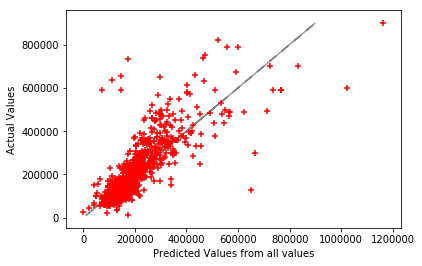

MSE: 4468463849.295587
                                           0
lat                            -6.143578e+05
lon                            -9.611421e+04
surface_total_in_m2             1.353691e+03
dummy_property_type__apartment  4.224464e+04
dummy_property_type__house      1.748774e+04
dummy_property_type__store     -2.255955e+04
distSubte                       7.127158e+03
dummy_pileta                    5.454664e+02
dummy_balcon                   -3.121382e+03
dummy_patio                    -2.134501e+03
dummy_lavadero                  1.142927e+04
dummy_cochera                   3.042958e+04
dummy_luminoso                 -5.939440e+03
dummy_terraza                   7.482735e+03
dummy_quincho                   8.358093e+03
dummy_baulera                   6.809387e+03
dummy_parrilla                 -4.113208e+03
dummy_premium                   1.557941e+04
dummy_piscina                   2.325467e+04
dummy_ascensor                 -1.635579e+04
dummy_profesional              -

In [51]:
def sum_mod(model, Xa):
    a = pd.DataFrame(model.coef_ , Xa.columns.values)
    a = a.append(pd.DataFrame([model.intercept_, model.score(Xa, ya)], index=['Intecept','R2']))
    return(a)

lm = linear_model.LinearRegression()
Xa = df_no_expenses_X
ya = df_no_expenses_Y['price_aprox_usd']
model = lm.fit(Xa, ya)
predictions = model.predict(Xa)

# Plot the model
plt.plot(ya,ya, '-.',c='grey')
plt.scatter(predictions, ya, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from all values")
plt.ylabel("Actual Values")
plt.show()
print ("MSE:", mean_squared_error(ya, predictions))
print (sum_mod(model, Xa))